In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("online retail.csv") 

In [11]:
df.head(5)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom


In [17]:
df["CustomerID"].unique()

array([17850., 13047., 12583., ..., 13298., 14569., 12713.], shape=(4373,))

In [23]:
df.describe

<bound method NDFrame.describe of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

                InvoiceDate  UnitPrice  C

In [24]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [74]:
TotalAmount = df["Quantity"] * df["UnitPrice"]
#df.insert(loc=5,column="TotalAmount",value=TotalAmount)


In [75]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,TotalAmount,UnitPrice,CustomerID,Country,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,15.30,2.55,17850.0,United Kingdom,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,20.34,3.39,17850.0,United Kingdom,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,22.00,2.75,17850.0,United Kingdom,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,20.34,3.39,17850.0,United Kingdom,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,20.34,3.39,17850.0,United Kingdom,2010


In [47]:
new_df = df[["CustomerID","InvoiceNo","StockCode","Quantity","TotalAmount","InvoiceDate","Country"]]
new_df2 = df.copy()

In [48]:
new_df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,TotalAmount,InvoiceDate,Country
0,17850.0,536365,85123A,6,15.30,12/01/2010 08:26:00,United Kingdom
1,17850.0,536365,71053,6,20.34,12/01/2010 08:26:00,United Kingdom
2,17850.0,536365,84406B,8,22.00,12/01/2010 08:26:00,United Kingdom
3,17850.0,536365,84029G,6,20.34,12/01/2010 08:26:00,United Kingdom
4,17850.0,536365,84029E,6,20.34,12/01/2010 08:26:00,United Kingdom


In [49]:
#grouping countres by totalamount of sales
country_price = new_df.groupby("Country")["Quantity"].sum().sort_values(ascending = False)
country_price

Country
United Kingdom          4263829
Netherlands              200128
EIRE                     142637
Germany                  117448
France                   110480
Australia                 83653
Sweden                    35637
Switzerland               30325
Spain                     26824
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16180
Finland                   10666
Channel Islands            9479
Denmark                    8188
Italy                      7999
Cyprus                     6317
Singapore                  5234
Austria                    4827
Hong Kong                  4769
Israel                     4353
Poland                     3653
Unspecified                3300
Canada                     2763
Iceland                    2458
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652


<Axes: xlabel='Country'>

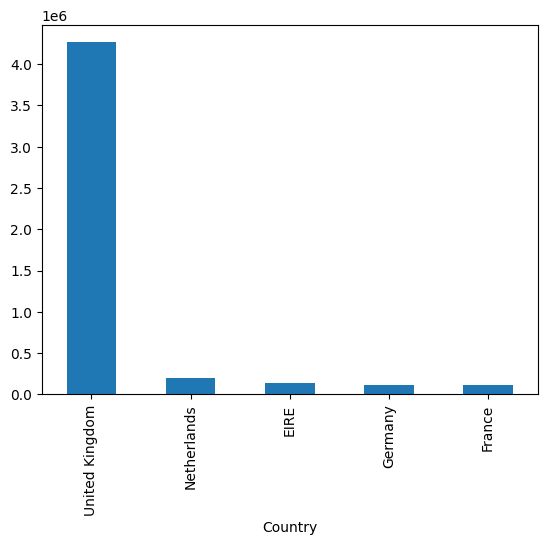

In [51]:
#Top 5 Companies with high number of purchase
country_price[:5].plot(kind="bar")

<Axes: xlabel='Country'>

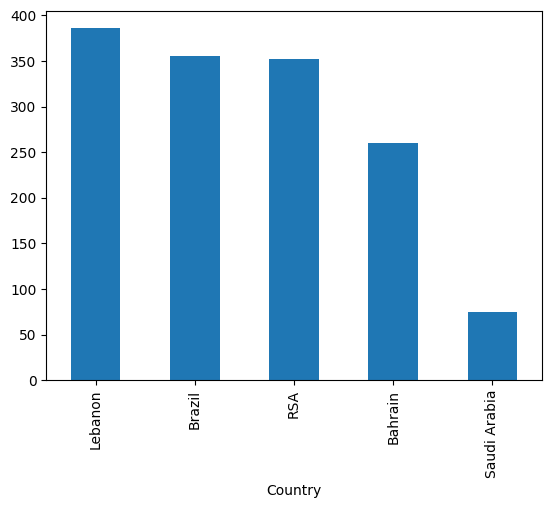

In [53]:
#5 compaies with least number of purchase
country_price[33:].plot(kind="bar")

In [63]:
# adding year column to the dataset
timest = new_df["InvoiceDate"].dt.year
new_df["Year"] = timest
new_df.head()

C:\Users\SNEHA\AppData\Local\Temp\ipykernel_38368\1818778968.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Year"] = timest


,CustomerID,InvoiceNo,StockCode,Quantity,TotalAmount,InvoiceDate,Country,Year
0,17850.0,536365,85123A,6,15.30,2010-12-01 08:26:00,United Kingdom,2010
1,17850.0,536365,71053,6,20.34,2010-12-01 08:26:00,United Kingdom,2010
2,17850.0,536365,84406B,8,22.00,2010-12-01 08:26:00,United Kingdom,2010
3,17850.0,536365,84029G,6,20.34,2010-12-01 08:26:00,United Kingdom,2010
4,17850.0,536365,84029E,6,20.34,2010-12-01 08:26:00,United Kingdom,2010


<Axes: xlabel='Year'>

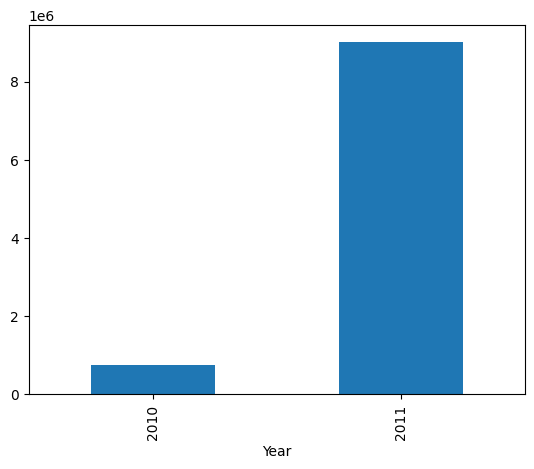

In [64]:
#total sales for different years
new_df.groupby("Year")["TotalAmount"].sum().plot(kind="bar")

C:\Users\SNEHA\AppData\Local\Temp\ipykernel_38368\1778929780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Mon"] = new_df["InvoiceDate"].dt.month


<Axes: title={'center': 'Sales Month wise'}, xlabel='Mon,Year'>

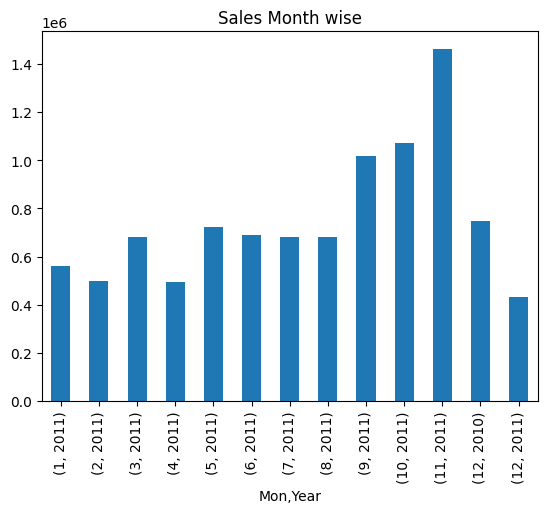

In [65]:
#sales for different months
new_df["Mon"] = new_df["InvoiceDate"].dt.month
new_df["month"]= new_df["InvoiceDate"].dt.month_name()
new_df.groupby(["Mon","Year"])["TotalAmount"].sum().plot(kind="bar",title = "Sales Month wise")

In [66]:
# Checking why dec 2011 has a drop comparing to nov 2011
get_2011 = new_df[(new_df['Year'] == 2011)]
get_dec2011 = get_2011[(new_df['month'] == 'December')]
get_dec2011 = get_dec2011['InvoiceDate'].dt.date.unique()
get_dec2011

C:\Users\SNEHA\AppData\Local\Temp\ipykernel_38368\2588636060.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  get_dec2011 = get_2011[(new_df['month'] == 'December')]


array([datetime.date(2011, 12, 1), datetime.date(2011, 12, 2),
       datetime.date(2011, 12, 4), datetime.date(2011, 12, 5),
       datetime.date(2011, 12, 6), datetime.date(2011, 12, 7),
       datetime.date(2011, 12, 8), datetime.date(2011, 12, 9)],
      dtype=object)

In [67]:
new_df = new_df.dropna()
new_df.isnull().sum()

CustomerID     0
InvoiceNo      0
StockCode      0
Quantity       0
TotalAmount    0
InvoiceDate    0
Country        0
Year           0
Mon            0
month          0
dtype: int64

<Axes: title={'center': 'Most Customers for country'}, xlabel='Country'>

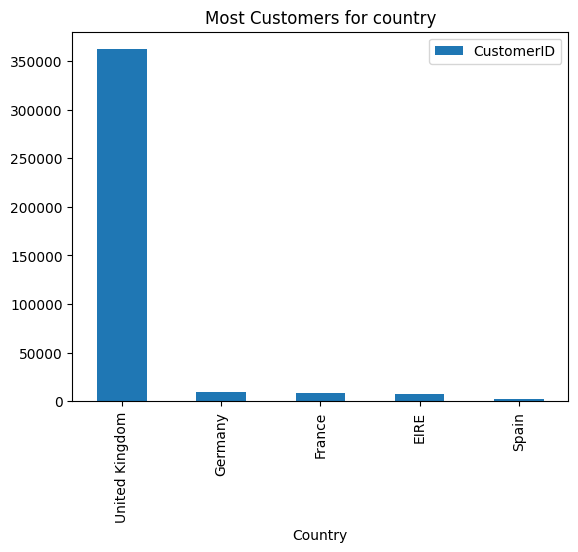

In [68]:
#Countries with more number of customers
cus_id = pd.DataFrame(new_df.groupby('Country')['CustomerID'].count().sort_values(ascending = False))
cus_id[:5].plot(kind = 'bar', title = 'Most Customers for country')

<Axes: title={'center': 'Least customers for country'}, xlabel='Country'>

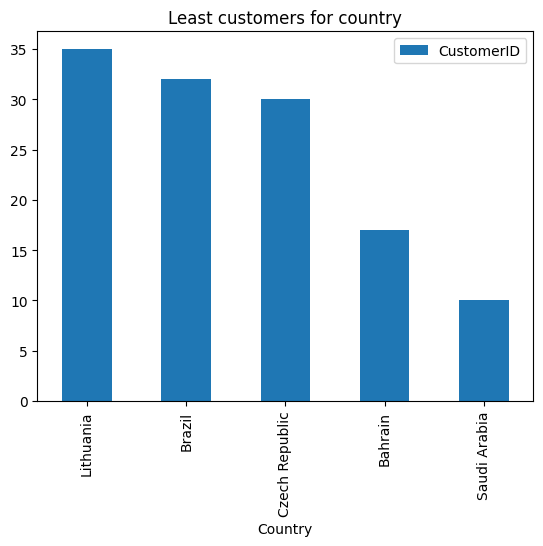

In [69]:
# Countries with less number of customers
cus_id[-5:].plot(kind = 'bar', title = 'Least customers for country')

In [70]:
# Removing the null values since we are checking the data based on customer and description
new_df2 = new_df2.dropna()
new_df2.isnull().sum()
new_df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,TotalAmount,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26:00,15.30,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26:00,20.34,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26:00,22.00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26:00,20.34,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26:00,20.34,3.39,17850.0,United Kingdom


In [80]:
# Sales Average of each product
avg_sales = new_df2.groupby(["StockCode", "Description"])[["Quantity", "TotalAmount"]].mean().sort_values(by="Quantity", ascending=False)

avg_sales

,,Quantity,TotalAmount
StockCode,Description,,
47556B,TEA TIME TEA TOWELS,1300.000000,3022.500000
84568,GIRLS ALPHABET IRON ON PATCHES,520.000000,97.200000
84826,ASSTD DESIGN 3D PAPER STICKERS,368.702703,9.145405
18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,325.333333,21.320000
20914,SET/5 RED SPOTTY LID GLASS BOWLS,288.000000,734.400000
...,...,...,...
21412,VINTAGE GOLD TINSEL REEL,-6.000000,-2.520000
79323W,WHITE CHERRY LIGHTS,-8.000000,-54.000000
21144,PINK POODLE HANGING DECORATION,-12.000000,-4.560000
